<a href="https://colab.research.google.com/github/bogard75/bogard75.github.io/blob/master/ecos_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import requests
import datetime as dt
import numpy as np
import pandas as pd

##1 한은 ECOS Open API

In [3]:
#url = 'http://ecos.bok.or.kr/api/StatisticTableList/HSR8HN3LD76UPXWLXEDX/xml/kr/1/10/'
#url = 'http://ecos.bok.or.kr/api/StatisticMeta/HSR8HN3LD76UPXWLXEDX/xml/kr/1/10/경제심리/'
# 통계코드검색 (http://ecos.bok.or.kr/jsp/openapi/OpenApiController.jsp?t=guideStatCd&menuGroup=MENU000004&menuCode=MENU000024)
# 3. 예금/대출금/기타금융
#    3.5 지역별 여수신
#        3.5.1 예금은행 수신 및 여신
#              3.5.1.1 예금은행 지역별예금(말잔)[088Y002]
#                      원화예금[100000]
#                      요구불예금[110000]
#                      저축성예금[120000]
#              3.5.1.2 예금은행 지역별대출금(말잔)[088Y003]
#                      원화대출금[200000]
#                      시설자금[20Y000]
#                      운전자금[20X000]



api_key = 'HSR8HN3LD76UPXWLXEDX'
url = 'http://ecos.bok.or.kr/api/StatisticSearch/{0}/xml/kr/1/100'.format(api_key) 

#ecos_request_data(url, '088Y002/MM/201101/202001/100000/X00')
def ecos_request_data(url, item):
    ret = requests.get('/'.join([url, item]))
    xml = BeautifulSoup(ret.text, 'xml')
    lst = [[r.find('TIME').contents[0], r.find('DATA_VALUE').contents[0]] for r in xml.find_all('row')]

    time_format = item.split('/')[1]
    data_value = item.split('/')[-1]

    df = pd.DataFrame(lst, columns=[time_format, data_value])

    if time_format=='YY':
        df[time_format] = pd.to_datetime(df[time_format], format='%Y', errors='coerce')
    elif time_format=='MM':
        df[time_format] = pd.to_datetime(df[time_format], format='%Y%m', errors='coerce')
    else:
        df[time_format] = pd.to_datetime(df[time_format], format='%Y%m', errors='coerce')

    df[data_value] = pd.to_numeric(df[data_value], errors='coerce')
    df = df.set_index(time_format)
    return df



In [22]:
dep_X00 = ecos_request_data(url, '088Y002/MM/201501/202008/100000/X00')



In [24]:
dep_X00



,X00
MM,
2015-01-01,1069318.2
2015-02-01,1079856.8
2015-03-01,1092540.1
2015-04-01,1093039.1
2015-05-01,1104368.2
...,...
2020-04-01,1575227.0
2020-05-01,1603459.7
2020-06-01,1627424.3


In [ ]:
ret = requests.get('http://ecos.bok.or.kr/api/StatisticTableList/HSR8HN3LD76UPXWLXEDX/xml/kr/1/10/')
xml = BeautifulSoup(ret.text, 'xml')
xml


##2 예금은행지역별예금말잔 현황

In [12]:
dep_X00 = ecos_request_data(url, '088Y002/MM/201101/202010/100000/X00')  # 예금은행지역별예금말잔/원화예금/전국
dep_A00 = ecos_request_data(url, '088Y002/MM/201101/202010/100000/A00')  # 예금은행지역별예금말잔/원화예금/서울
dep_D00 = ecos_request_data(url, '088Y002/MM/201101/202010/100000/D00')  # 예금은행지역별예금말잔/원화예금/인천
dep_L00 = ecos_request_data(url, '088Y002/MM/201101/202010/100000/L00')  # 예금은행지역별예금말잔/원화예금/경기
dep_B00 = ecos_request_data(url, '088Y002/MM/201101/202010/100000/B00')  # 예금은행지역별예금말잔/원화예금/부산
dep_G00 = ecos_request_data(url, '088Y002/MM/201101/202010/100000/G00')  # 예금은행지역별예금말잔/원화예금/울산
dep_T00 = ecos_request_data(url, '088Y002/MM/201101/202010/100000/T00')  # 예금은행지역별예금말잔/원화예금/경남
dep_C00 = ecos_request_data(url, '088Y002/MM/201101/202010/100000/C00')  # 예금은행지역별예금말잔/원화예금/대구
dep_S00 = ecos_request_data(url, '088Y002/MM/201101/202010/100000/S00')  # 예금은행지역별예금말잔/원화예금/경북

deposit = pd.concat([dep_A00,dep_D00,dep_L00,dep_B00,dep_G00,dep_T00,dep_C00,dep_S00],axis=1)

In [ ]:
#deposit['수도권']=deposit['A00']+deposit['D00']+deposit['L00']
#deposit['부울경']=deposit['B00']+deposit['G00']+deposit['T00']
#deposit['대경권']=deposit['C00']+deposit['S00']

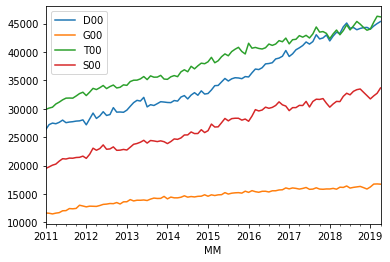

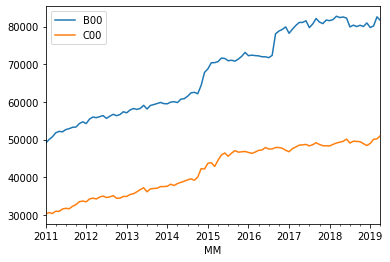

In [13]:
deposit.drop(columns=['A00','L00','B00','C00']).plot()
deposit[['B00','C00']].plot()

In [ ]:
import matplotlib.pyplot as plt

#plt.plot(예금은행지역별예금말잔_원화예금_수도권)
plt.plot(예금은행지역별예금말잔_원화예금_부울경)
plt.plot(예금은행지역별예금말잔_원화예금_대경권)

NameError: ignored

##3 예금은행지역별대출금 현황 (088Y003)


In [ ]:
ln_X00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/X00')  # 예금은행지역별예금말잔/원화예금/전국
ln_A00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/A00')  # 예금은행지역별예금말잔/원화예금/서울
ln_D00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/D00')  # 예금은행지역별예금말잔/원화예금/인천
ln_L00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/L00')  # 예금은행지역별예금말잔/원화예금/경기
ln_B00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/B00')  # 예금은행지역별예금말잔/원화예금/부산
ln_G00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/G00')  # 예금은행지역별예금말잔/원화예금/울산
ln_T00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/T00')  # 예금은행지역별예금말잔/원화예금/경남
ln_C00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/C00')  # 예금은행지역별예금말잔/원화예금/대구
ln_S00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/S00')  # 예금은행지역별예금말잔/원화예금/경북

loan = pd.concat([ln_A00,ln_D00,ln_L00,ln_B00,ln_G00,ln_T00,ln_C00,ln_S00],axis=1)

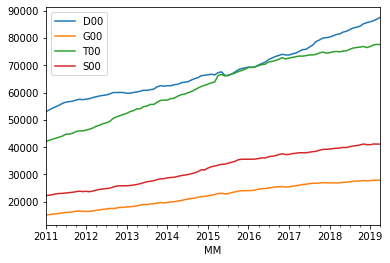

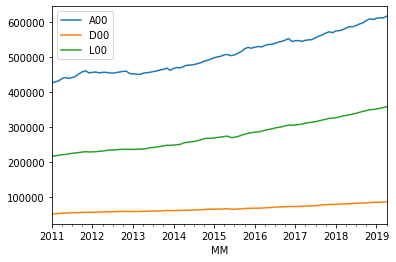

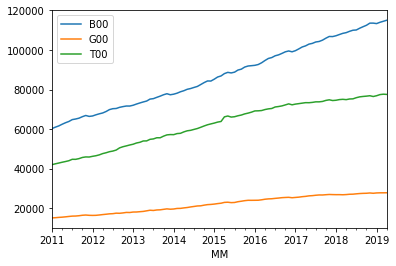

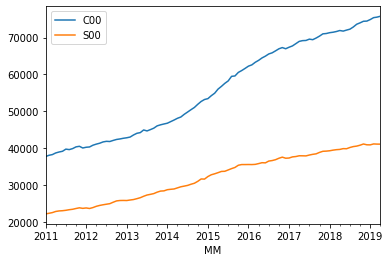

In [ ]:
loan.drop(columns=['A00','L00','B00','C00']).plot()
loan[['A00','D00','L00']].plot()
loan[['B00','G00','T00']].plot()
loan[['C00','S00']].plot()


###기업대출금(1A0000), 중소기업대출(X120000)


In [31]:
ln_X00 = ecos_request_data(url, '088Y004/MM/201301/202009/1A0000/X00')  # 예금은행기업대출금말잔/기업대출금/전국
ln_A00 = ecos_request_data(url, '088Y004/MM/201301/202009/1A0000/A00')  # 예금은행기업대출금말잔/기업대출금/서울
ln_D00 = ecos_request_data(url, '088Y004/MM/201301/202009/1A0000/D00')  # 예금은행기업대출금말잔/기업대출금/인천
ln_L00 = ecos_request_data(url, '088Y004/MM/201301/202009/1A0000/L00')  # 예금은행기업대출금말잔/기업대출금/경기
ln_B00 = ecos_request_data(url, '088Y004/MM/201301/202009/1A0000/B00')  # 예금은행기업대출금말잔/기업대출금/부산
ln_G00 = ecos_request_data(url, '088Y004/MM/201301/202009/1A0000/G00')  # 예금은행기업대출금말잔/기업대출금/울산
ln_T00 = ecos_request_data(url, '088Y004/MM/201301/202009/1A0000/T00')  # 예금은행기업대출금말잔/기업대출금/경남
ln_C00 = ecos_request_data(url, '088Y004/MM/201301/202009/1A0000/C00')  # 예금은행기업대출금말잔/기업대출금/대구
ln_S00 = ecos_request_data(url, '088Y004/MM/201301/202009/1A0000/S00')  # 예금은행기업대출금말잔/기업대출금/경북

loan = pd.concat([ln_A00,ln_D00,ln_L00,ln_B00,ln_G00,ln_T00,ln_C00,ln_S00],axis=1)

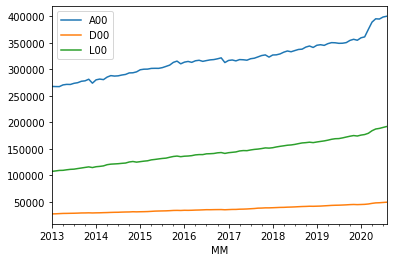

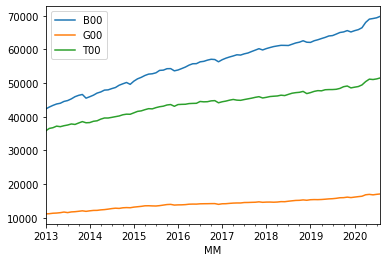

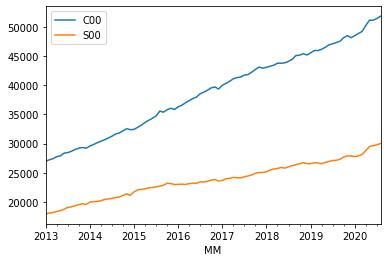

In [32]:
loan[['A00','D00','L00']].plot()
loan[['B00','G00','T00']].plot()
loan[['C00','S00']].plot()

##은행대출금 연체율

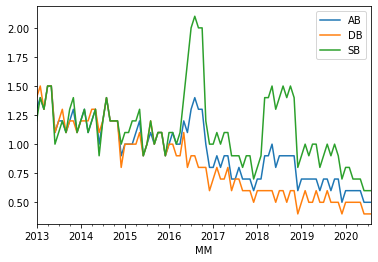

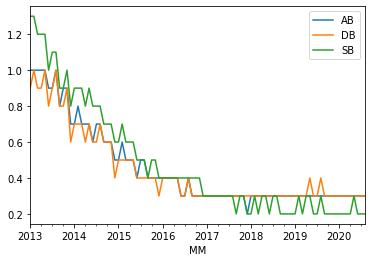

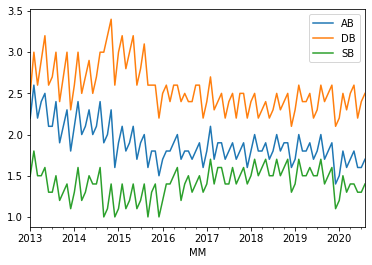

In [44]:
# 기업
AB = ecos_request_data(url, '085Y002/MM/201301/202009/MO3AA/AB')  
DB = ecos_request_data(url, '085Y002/MM/201301/202009/MO3AA/DB')  
SB = ecos_request_data(url, '085Y002/MM/201301/202009/MO3AA/SB')  
pd.concat([AB, DB, SB], axis=1).plot()

# 가계
AB = ecos_request_data(url, '085Y002/MM/201301/202009/MO3AB/AB')  
DB = ecos_request_data(url, '085Y002/MM/201301/202009/MO3AB/DB')  
SB = ecos_request_data(url, '085Y002/MM/201301/202009/MO3AB/SB')  
pd.concat([AB, DB, SB], axis=1).plot()

# 카드
AB = ecos_request_data(url, '085Y002/MM/201301/202009/MO3AC/AB')  
DB = ecos_request_data(url, '085Y002/MM/201301/202009/MO3AC/DB')  
SB = ecos_request_data(url, '085Y002/MM/201301/202009/MO3AC/SB')  
pd.concat([AB, DB, SB], axis=1).plot()

##12 기업경영분석
###12.1 기업경영분석지표
####12.1.1 기업경영분석지표(2009~,전수조사) [027Y431]
- 전산업ZZZ00, 제조업C
- 부채비율[707][%]
- 자기자본비율[701][%]
- 차입금의존도[710][%]
- 유동비율[702][%]
- 비유동비율[7051][%]
- 매출액영업이익률[611][%]
- 매출액세전순이익률[6091][%]
- 이자보상비율[627][%] ★
- 금융비용부담률[625][%]
- 차입금평균이자율[623][%]
- 인건비대매출액[616][%]
- 인건비대영업총비용[6161][%]
- 매출액증가율[506][%]
- 유형자산증가율[502][%]
- 총자산증가율[501][%]


In [ ]:
#ecos_request_data(url, '027Y431/YY/2000/2020/ZZZ00/701')  # 기업경영분석지표/전산업/종합/총자산증가율
fs_code=['707','701','710','702','7051','611','6091','627','625','623','616','6161'] #,'506','502','501']
fsa = pd.concat([ecos_request_data(url, '027Y431/YY/2000/2020/ZZZ00/{0}'.format(c)) for c in fs_code], axis=1)

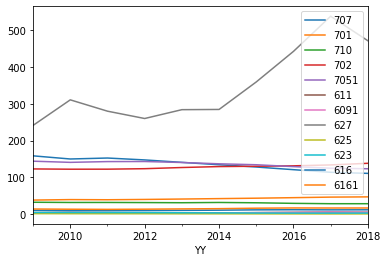

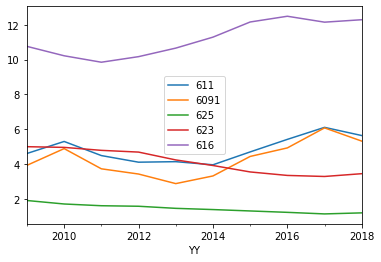

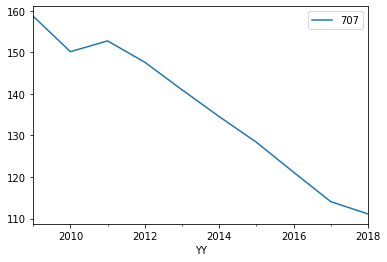

In [ ]:
#fsa.drop(columns=['627']).plot()
#url
fsa.plot()
top_7 = fsa.loc['2018-01-01'].sort_values(ascending=False)[:7].index
fsa.drop(columns=top_7).plot()
fsa[['707']].plot()